In [1]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from pydub import AudioSegment

mp3File = "/source_file.mp3"
wavFile = "/source_file.wav"

# Convert .wav to .mp3                                                            
audio = AudioSegment.from_mp3(mp3File)
audio.export(wavFile, format="wav")


<_io.BufferedRandom name='/source_file.wav'>

In [4]:
!pip install soundfile 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import soundfile as sf

# Retrieve the data from the wav file
data, samplerate = sf.read(wavFile)


In [6]:
print("Sample rate : {} Hz".format(samplerate))

Sample rate : 48000 Hz


In [7]:
import numpy as np
n = len(data) #panjang data array yang dimiliki data 
Fs = samplerate #sample rate
# menggunakanstereo audio, terdapat dua channel yang ada di data
# mendapatkan data dari masing masing channel secara terpisah:
ch1 = np.array([data[i][0] for i in range(n)]) #channel 1
ch2 = np.array([data[i][1] for i in range(n)]) #channel 2


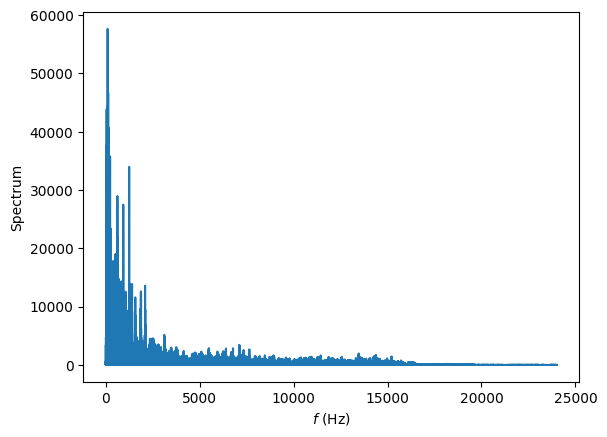

In [8]:
import matplotlib.pyplot as plt
ch1_Fourier = np.fft.fft(ch1) #melakukan Fast Fourier Transform
abs_ch1_Fourier = np.absolute(ch1_Fourier[:n//2]) #spectrume 
plt.plot(np.linspace(0, Fs / 2, n//2), abs_ch1_Fourier)
plt.ylabel('Spectrum')
plt.xlabel('$f$ (Hz)')
plt.show()

f0 : 23810 Hz


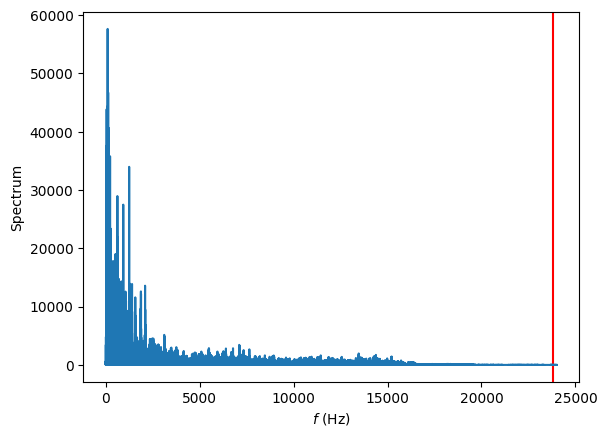

In [9]:
eps = 1e-5
# Booleran array dimana setiap nilai mengindikasinya untuk tetap kita jaga nilai frekuensinya
frequenciesToRemove = (1 - eps) * np.sum(abs_ch1_Fourier) < np.cumsum(abs_ch1_Fourier)
# frekuensi yang di potong dibagian spectrum
f0 = (len(frequenciesToRemove) - np.sum(frequenciesToRemove) )* (Fs / 2) / (n / 2)
print("f0 : {} Hz".format(int(f0)))
# menampilkan spectrum dengan garis vertikal untuk f0
plt.axvline(f0, color='r')
plt.plot(np.linspace(0, Fs / 2, n//2), abs_ch1_Fourier)
plt.ylabel('Spectrum')
plt.xlabel('$f$ (Hz)')
plt.show()


In [10]:
#Pertama mendefinisikan nama dari output files
wavCompressedFile = "audio_compressed.wav"
mp3CompressedFile = "audio_compressed.mp3"

#Definisikan downsampling factor
D = int(Fs / f0)
print("Downsampling factor : {}".format(D))
new_data = data[::D, :] #mendapatkan sample data

#menulisakan data baru dalam formal wav file
sf.write(wavCompressedFile, new_data, int(Fs / D), 'PCM_16')

#converting kembali menggunakan format mp3
audioCompressed = AudioSegment.from_wav(wavCompressedFile)
audioCompressed.export(mp3CompressedFile, format="mp3")


Downsampling factor : 2


<_io.BufferedRandom name='audio_compressed.mp3'>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New section